# In the below project the cleaning of the tweets from text column , tokenization of tweets and removal of stop words has been done.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
print(df_train.shape)
print(df_test.shape)


(7613, 5)
(3263, 4)


In [4]:
display(df_train.sample(7))
print()
display(df_test.sample(7))

,id,keyword,location,text,target
3994,5673,floods,london,there's this person &amp; they reckon when you...,0
4298,6104,hellfire,"Denver, Colorado",(Also I dont think sewing thought a leather be...,0
4736,6735,lava,"San Jose, CA",A river of lava in the sky this evening! It wa...,0
3536,5056,eyewitness,"Orlando, Fl",WFTV Eyewitness News: FBI: Man who stole US se...,0
337,484,armageddon,NaN,#Christians United for #Israel (#CUFI): Jews s...,0
1339,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...,1
7431,10629,wounded,NaN,National free root beer float day is tomorrow ...,0


,id,keyword,location,text
2903,9622,thunderstorm,Lake Hefner Bike Trail,Stood there for 20 mics tryin to get a #lightn...
2442,8160,rescuers,NaN,Fears over missing migrants in Med: Rescuers s...
902,2977,dead,My World,Ross better not be dead! #Emmerdale
1626,5472,flames,NaN,@xodeemorgss she went to get rice and the whol...
2226,7429,obliterated,"Calgary, Alberta, Canada",Disgusting! Drunk Meals 101: What To Cook When...
2258,7509,oil%20spill,NaN,PODCAST: Oil spill anniversary http://t.co/wVd...
1890,6367,hostages,"Hubli, Karnataka",@IndiaToday @Iamtssudhir Time for India to joi...


In [5]:
import re
import string
import pandas as pd

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(
        r'['
        u'\U0001F600-\U0001F64F'
        u'\U0001F300-\U0001F5FF'
        u'\U0001F680-\U0001F6FF'
        u'\U0001F1E0-\U0001F1FF'
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+', 
        '', 
        text
    )
    text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = " ".join(text.split())
    return text

df_train['text_clean'] = df_train['text'].apply(clean_text)
df_test['text_clean'] = df_test['text'].apply(clean_text)

print("Cleaned Train Data:")
print(df_train[['text', 'text_clean']].head())

print("---" * 30)

print("Cleaned Test Data:")
print(df_test[['text', 'text_clean']].head())


Cleaned Train Data:
                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                          text_clean  
0  our deeds are the reason of this earthquake ma...  
1              forest fire near la ronge sask canada  
2  all residents asked to shelter in place are be...  
3  13000 people receive wildfires evacuation orde...  
4  just got sent this photo from ruby alaska as s...  
------------------------------------------------------------------------------------------
Cleaned Test Data:
                                                text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a forest fire at spot p

In [6]:
df_train.isnull().sum()

id               0
keyword         61
location      2533
text             0
target           0
text_clean       0
dtype: int64

In [7]:
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
# We will tokenize the 'text_clean' column

df_train['tokenized']=df_train['text_clean'].apply(word_tokenize)
df_test['tokenized']=df_test['text_clean'].apply(word_tokenize)



In [10]:
# Display tokenized results
print("Train Data Tokenized:")
print(df_train[['text_clean', 'tokenized']].head())

print("---" * 30)

print("Test Data Tokenized:")
print(df_test[['text_clean', 'tokenized']].head())

Train Data Tokenized:
                                          text_clean  \
0  our deeds are the reason of this earthquake ma...   
1              forest fire near la ronge sask canada   
2  all residents asked to shelter in place are be...   
3  13000 people receive wildfires evacuation orde...   
4  just got sent this photo from ruby alaska as s...   

                                           tokenized  
0  [our, deeds, are, the, reason, of, this, earth...  
1      [forest, fire, near, la, ronge, sask, canada]  
2  [all, residents, asked, to, shelter, in, place...  
3  [13000, people, receive, wildfires, evacuation...  
4  [just, got, sent, this, photo, from, ruby, ala...  
------------------------------------------------------------------------------------------
Test Data Tokenized:
                                          text_clean  \
0                 just happened a terrible car crash   
1  heard about earthquake is different cities sta...   
2  there is a forest fire at sp

In [11]:
import nltk
print(nltk.data.find('tokenizers/punkt'))

C:\Users\Dell\AppData\Roaming\nltk_data\tokenizers\punkt


In [12]:
nltk.download('punkt', download_dir="D:/Brainworks/Projects/Tweet_analysis/venv")
import nltk
nltk.data.path.append("D:/Brainworks/Projects/Tweet_analysis/venv")

[nltk_data] Downloading package punkt to
[nltk_data]     D:/Brainworks/Projects/Tweet_analysis/venv...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
display(df_train.sample(5))
print()
display(df_test.sample(5))

,id,keyword,location,text,target,text_clean,tokenized
7074,10132,upheaval,NaN,Acquire your postexistence straight a elevatio...,0,acquire your postexistence straight a elevatio...,"[acquire, your, postexistence, straight, a, el..."
532,774,avalanche,"Jersey City, New Jersey",Musician Kalle Mattson Recreates 34 Classic Al...,0,musician kalle mattson recreates 34 classic al...,"[musician, kalle, mattson, recreates, 34, clas..."
1844,2651,crashed,Buenos Aires,MH370: Intact part lifts odds plane glided not...,1,mh370 intact part lifts odds plane glided not ...,"[mh370, intact, part, lifts, odds, plane, glid..."
69,98,accident,"Santa Clara, CA",Accident center lane blocked in #SantaClara on...,1,accident center lane blocked in santaclara on ...,"[accident, center, lane, blocked, in, santacla..."
3882,5520,flattened,"Frome, Somerset, England",Zouma has just absolutely flattened that guy ??,0,zouma has just absolutely flattened that guy,"[zouma, has, just, absolutely, flattened, that..."


,id,keyword,location,text,text_clean,tokenized
1781,6016,hazardous,NaN,#hot #fiat Olap #world pres: http://t.co/QddYw...,hot fiat olap world pres how to recognize a ha...,"[hot, fiat, olap, world, pres, how, to, recogn..."
1790,6044,heat%20wave,"For a healthier, happier YOU!",Never really seen olive leaf extract to help w...,never really seen olive leaf extract to help w...,"[never, really, seen, olive, leaf, extract, to..."
2471,8263,rioting,Azeroth,@amiestager there's better alternatives than r...,amiestager theres better alternatives than rio...,"[amiestager, theres, better, alternatives, tha..."
9,29,NaN,NaN,Fuck off!,fuck off,"[fuck, off]"
2218,7406,obliterated,Nanda Parbat,Mad kids and innocent people who had nothing t...,mad kids and innocent people who had nothing t...,"[mad, kids, and, innocent, people, who, had, n..."


# We will do lowercase,Stopword removal, POS tagging, and Wordnet Conversion

In [15]:
df_train['lower']=df_train['tokenized'].map(lambda tokens:[word.lower() for word in tokens])

##display the first few rows of processed data
print(df_train[['tokenized','lower']].head())

                                           tokenized  \
0  [our, deeds, are, the, reason, of, this, earth...   
1      [forest, fire, near, la, ronge, sask, canada]   
2  [all, residents, asked, to, shelter, in, place...   
3  [13000, people, receive, wildfires, evacuation...   
4  [just, got, sent, this, photo, from, ruby, ala...   

                                               lower  
0  [our, deeds, are, the, reason, of, this, earth...  
1      [forest, fire, near, la, ronge, sask, canada]  
2  [all, residents, asked, to, shelter, in, place...  
3  [13000, people, receive, wildfires, evacuation...  
4  [just, got, sent, this, photo, from, ruby, ala...  


In [16]:
df_train.head()

,id,keyword,location,text,target,text_clean,tokenized,lower
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[just, got, sent, this, photo, from, ruby, ala..."


In [17]:
from nltk.corpus import stopwords

##Ensure stopwords are available
nltk.download('stopwords')
stop=set(stopwords.words('english'))

###Remove stopwords from the 'lower' column
df_train['stopwords_removed']=df_train['lower'].map(lambda tokens:[word for word in tokens if word not in stop])

##display the first few rows with stopwords removed
print(df_train[['lower','stopwords_removed']].head())


                                               lower  \
0  [our, deeds, are, the, reason, of, this, earth...   
1      [forest, fire, near, la, ronge, sask, canada]   
2  [all, residents, asked, to, shelter, in, place...   
3  [13000, people, receive, wildfires, evacuation...   
4  [just, got, sent, this, photo, from, ruby, ala...   

                                   stopwords_removed  
0  [deeds, reason, earthquake, may, allah, forgiv...  
1      [forest, fire, near, la, ronge, sask, canada]  
2  [residents, asked, shelter, place, notified, o...  
3  [13000, people, receive, wildfires, evacuation...  
4  [got, sent, photo, ruby, alaska, smoke, wildfi...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df_train.head()

,id,keyword,location,text,target,text_clean,tokenized,lower,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

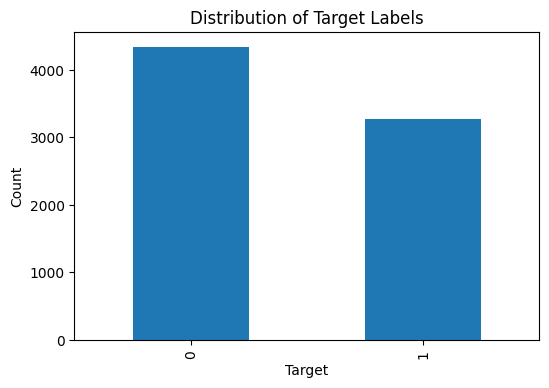

In [32]:
# Label Distribution
label_counts = df_train['target'].value_counts()
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title("Distribution of Target Labels")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()